# Example Fit 1D using tau_upperlimitstools_fitting module

In [1]:
import ROOT

Welcome to JupyROOT 6.26/02


In [2]:
import sys
sys.path.append("/home/marcela/Documents/kek_postdoc/tau_upperlimitstools_fitting/src/tau_upperlimitstools_fitting/")
import functions_fit as tau_tools

In [3]:
import imp

In [4]:
imp.reload(tau_tools)

<module 'functions_fit' from '/home/marcela/Documents/kek_postdoc/tau_upperlimitstools_fitting/src/tau_upperlimitstools_fitting/functions_fit.py'>

### Specification of the extended s+b model  (from analytical functions)

TO DO: This can be generalized.

In [5]:
model_configuration={'model_sb': {'signal': 
                                        {'function':"gaussian", 
                                         'mean':"m[5]",
                                         'sigma':"s[1]",
                                         'pdf_name':'signal_pdf', 
                                         'nsig_yield_range':'[-20,1000]'}, 
                                  'background':{'function':"exponential", 
                                                 'coefficient':'c[-1/4]',
                                                'pdf_name':'background_pdf',
                                                'nbkg_yield_range':'[-10,3000]'},
                                  'variables_names':['x'],
                                  'variables_ranges':['[0,10]'],
                                  'dimension':"1D",
                                  'generate_data': True,
                                  'include_binned_data':True,
                                  'data_bins' : 100, 
                                  'pseudo_data_yields':{'n_sig':1, 'n_bkg':2000}
                                 }
                    }

In [6]:
# Create the workspace given the dictionary created before, and Add model configuration to the workspace
mywspace = tau_tools.create_workspace_extended_gausExp(model_configuration)

[#0] WARNING:InputArguments -- The parameter 's' with range [-1e+30, 1e+30] of the RooGaussian 'signal_pdf' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:ObjectHandling -- RooWorkspace::import(myWorkSpace) importing dataset pseudo_data
[#1] INFO:ObjectHandling -- RooWorkspace::import(myWorkSpace) importing dataset pseudo_data_binned


In [7]:
mywspace.Print()


RooWorkspace(myWorkSpace) myWorkSpace contents

variables
---------
(c,m,n_bkg,n_sig,s,x)

p.d.f.s
-------
RooExponential::background_pdf[ x=x c=c ] = 0.00673795
RooAddPdf::model_sb[ n_sig * signal_pdf + n_bkg * background_pdf ] = 0.00723433
RooGaussian::signal_pdf[ x=x mean=m sigma=s ] = 1

datasets
--------
RooDataSet::pseudo_data(x)
RooDataHist::pseudo_data_binned(x)

named sets
----------
ModelConfig_NuisParams:(n_bkg)
ModelConfig_Observables:(x)
ModelConfig_POI:(n_sig)

generic objects
---------------
RooStats::ModelConfig::ModelConfig



Note: 
<br>
After setting the values for generate_pseudodata_fromW, this will be the initial points for the FIT

In [8]:
print(mywspace.var("n_sig").getVal())
print(mywspace.var("n_bkg").getVal())

1.0
2000.0


### Fit to the pseudo_data

In [9]:
pdf = mywspace.pdf('model_sb')
data=mywspace.data("pseudo_data")
#Specify configuration for fitting, default minuit/migrat y strategy 1
fitResult = pdf.fitTo(data,
                      ROOT.RooFit.Extended(True),
                      ROOT.RooFit.Minos(True),
                      ROOT.RooFit.SumW2Error(False), 
                      ROOT.RooFit.Save(True), 
                      ROOT.RooFit.NumCPU(12),
                      ROOT.RooFit.PrintLevel(-1))

[#1] INFO:Minimization -- createConstraintTerm: caching constraint set under name CACHE_CONSTR_OF_PDF_model_sb_FOR_OBS_x with 0 entries
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Eval -- RooAbsTestStatistic::initMPMode: started 12 remote server process.
[#1] INFO:Minimization --  The following expressions have been identified as constant and will be precalculated and cached: (signal_pdf,background_pdf)
[#1] INFO:Minimization --  The following expressions have been identified as constant and will be precalculated and cached: (signal_pdf,background_pdf)
[#1] INFO:Minimization --  The following expressions have been identified as constant and will be precalculated and cached: (signal_pdf,background_pdf)
[#1] INFO:Minimization --  The following expressions have been identified as constant and will be precalculated and cached: (signal_pdf,background_pdf)
[#1] INFO:Minimization --  The following expressions have been identified as 

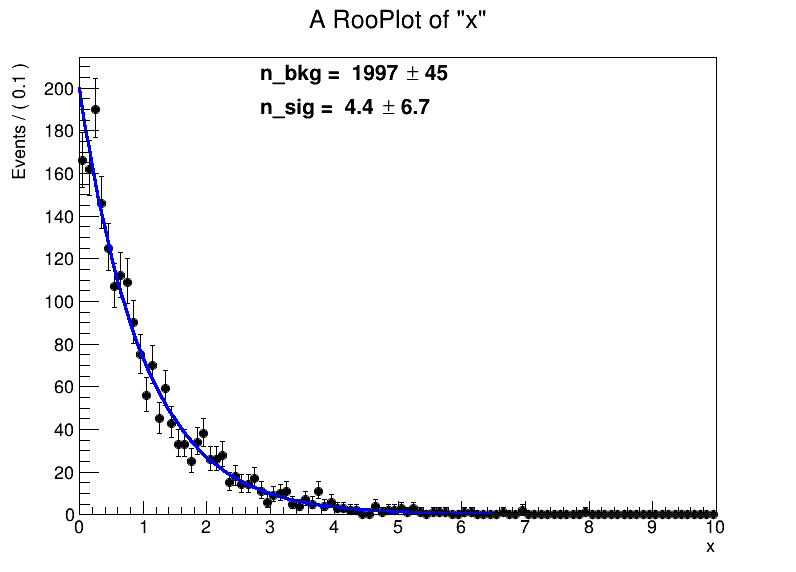

In [10]:
canvas_x = ROOT.TCanvas("test","tes", 800, 600)
frame = mywspace.var('x').frame()
data.plotOn(frame)
pdf.plotOn(frame)
pdf.paramOn(frame,ROOT.RooFit.Layout(0.32, 0.47, 0.9))
frame.Draw()
canvas_x.Draw()

In [11]:
fitResult.Print()


  RooFitResult: minimized FCN value: -11185.4, estimated distance to minimum: 7.63115e-06
                covariance matrix quality: Full, accurate covariance matrix
                Status : MINIMIZE=0 HESSE=0 MINOS=0 

    Floating Parameter    FinalValue +/-  Error   
  --------------------  --------------------------
                 n_bkg    1.9967e+03 +/-  4.51e+01
                 n_sig    4.4072e+00 +/-  6.65e+00



Note: 
<br>
After the fit n_sig is updated, this will be the value in the workspace.

In [12]:
tau_tools.check_status_fit(fitResult)

-------------------------------------------
A small edm value indicates effective convergence of the fit.
edm 7.631154544324778e-06 

A low minNll value indicates a successful fit finding a good description for the data.
minNll -11185.358102992523 

A value of 0 typically indicates a successful fit.
status 0 

A high covQual value (3) indicates good quality of the covariance matrix.
covQual 3 

A value of 0 suggests that all likelihood evaluations were valid.
numInvalidNll 0 

--------------------------------------------


### Save the workspace in a root file

In [13]:
#Save the WorkSpace in a root file to used later
tau_tools.save_myworkspace_infile(mywspace)

Workspace saved to workspace_model_sb.root with the name myWorkSpace
